In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
revenue=np.array([[100,200,220],[24,36,48],[12,18,20]])
expenses=np.array([[80,90,100],[10,16,20],[8,10,10]])

In [3]:
profit=revenue-expenses
profit

array([[ 20, 110, 120],
       [ 14,  20,  28],
       [  4,   8,  10]])

In [4]:
price_per_unit=np.array([1000,400,1200])
units=np.array([[30,40,50],[5,10,15],[2,5,7]])

In [5]:
df =pd.read_csv("housing_data.csv")
df

,area,bedrooms,price
0,1056.0,2.0,39.07
1,2600.0,4.0,120.00
2,1440.0,3.0,62.00
3,1521.0,3.0,75.00
4,1200.0,2.0,51.00
5,1170.0,2.0,38.00
6,2732.0,4.0,135.00
7,3300.0,4.0,155.00
8,3700.0,5.0,167.00
9,1800.0,3.0,82.00


In [8]:
from sklearn import preprocessing 
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
scaled_X



array([[0.02074074, 0.        ],
       [0.59259259, 0.66666667],
       [0.16296296, 0.33333333],
       [0.19296296, 0.33333333],
       [0.07407407, 0.        ],
       [0.06296296, 0.        ],
       [0.64148148, 0.66666667],
       [0.85185185, 0.66666667],
       [1.        , 1.        ],
       [0.2962963 , 0.33333333],
       [0.66111111, 0.66666667],
       [0.        , 0.        ],
       [0.03703704, 0.        ],
       [0.46296296, 0.33333333],
       [0.06481481, 0.        ],
       [0.06666667, 0.33333333],
       [0.2       , 0.33333333],
       [0.65555556, 0.33333333]])

In [7]:
scaled_Y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y

array([[0.00829457],
       [0.63565891],
       [0.18604651],
       [0.28682171],
       [0.10077519],
       [0.        ],
       [0.75193798],
       [0.90697674],
       [1.        ],
       [0.34108527],
       [0.79069767],
       [0.        ],
       [0.01550388],
       [0.48837209],
       [0.03100775],
       [0.07751938],
       [0.17054264],
       [0.49612403]])

In [13]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(number_of_features)
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        y_predicted=np.dot(w,scaled_X.T)+b
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b,cost, cost_list, epoch_list
w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)
w,b,cost

(array([0.64685734, 0.62452313]), -0.08518709491748717, 0.006356055928215955)

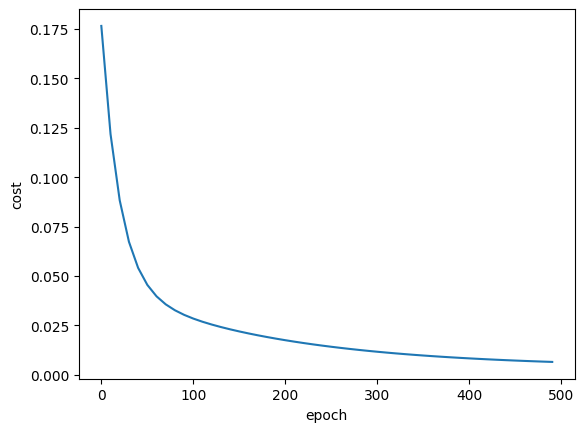

In [14]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [6]:
def groupAnagrams(strs):
        lst = {}
        for x in strs:
            sorted_x = tuple(sorted(x))  # Convert the sorted string to a tuple 
            print(sorted_x)
            if sorted_x not in lst:
                lst[sorted_x] = [x]
            else:
                lst[sorted_x].append(x)
        print(lst)
        rtn = []
        for x in lst.values():
            if x != []:
                rtn.append(x)
        return rtn
strs = ["eat","tea","tan","ate","nat","bat"]
f=groupAnagrams(strs)
print(f)


('a', 'e', 't')
('a', 'e', 't')
('a', 'n', 't')
('a', 'e', 't')
('a', 'n', 't')
('a', 'b', 't')
{('a', 'e', 't'): ['eat', 'tea', 'ate'], ('a', 'n', 't'): ['tan', 'nat'], ('a', 'b', 't'): ['bat']}
[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]


In [7]:

def isAnagram( s, t):
    if len(s)!=len(t):
            return False
    ana_hash={x:s.count(x) for x in s}
    for x in t:
    
        if x not in ana_hash or ana_hash[x]==0:
            return False 
        ana_hash[x]-=1
    return True
s=isAnagram('tagg','ggat')
print(s)

True


In [3]:
from collections import Counter  

def countInterestingSubarrays(nums, modulo, k):
        n = len(nums)
        cnt = Counter([0])
        res = 0
        prefix = 0
        for i in range(n):
            if nums[i] % modulo == k:
                prefix += 1 

            res += cnt[(prefix - k + modulo) % modulo]
            cnt[prefix % modulo] += 1
        return res
c=countInterestingSubarrays([3,2,4],2,1)
print(c)

3
